In [1]:
import os, gensim

def iter_documents(top_directory):
    """Iterate over all documents, yielding a document (=list of utf8 tokens) at a time."""
    for root, dirs, files in os.walk(top_directory):
        for file in filter(lambda file: file.endswith('.txt'), files):
            document = open(os.path.join(root, file), encoding='utf8').read() # read the entire document, as one big string
            yield gensim.utils.tokenize(document, lower=True) # or whatever tokenization suits you

class MyCorpus(object):
    def __init__(self, top_dir):
        self.top_dir = top_dir
        self.dictionary = gensim.corpora.Dictionary(iter_documents(top_dir))
        self.dictionary.filter_extremes(no_below=1, keep_n=30000) # check API docs for pruning params

    def __iter__(self):
        for tokens in iter_documents(self.top_dir):
            yield self.dictionary.doc2bow(tokens)

corpus = MyCorpus('Annual_Text') # create a dictionary

In [6]:
import logging
import os
from gensim import corpora, utils
from gensim.models.wrappers.dtmmodel import DtmModel
import numpy as np

os.environ['DTM_PATH'] = r"dtm-win64.exe"

if not os.environ.get('DTM_PATH', None):
    raise ValueError("SKIP: You need to set the DTM path")

In [7]:
time_seq = [1, 1, 1, 1, 1]

In [8]:
dtm_path = os.environ['DTM_PATH']

In [9]:
num_topics = 2

model = DtmModel(dtm_path, corpus, time_seq, num_topics=num_topics,
                 id2word=corpus.dictionary, initialize_lda=True)

In [10]:
topic_list = []

for id in range(num_topics):
    topic = [model.show_topic(topicid=id, time=time, topn=10) for time in range(5)]
    topic_list.append(topic)

In [11]:
topic_list[0]

[[(0.05617771518907585, 'prsus'),
  (0.02433173522046941, 'acquiror'),
  (0.018020962241859083, 'saye'),
  (0.013250699341272024, 'monthly'),
  (0.013078783826502568, 'nonm'),
  (0.007497092407252151, 'holley'),
  (0.007497092407252151, 'charles'),
  (0.006107425659968693, 'mandatory'),
  (0.005755314300634954, 'ceasing'),
  (0.005755314300634954, 'itepa')],
 [(0.06856131334373233, 'prsus'),
  (0.026129847414070366, 'acquiror'),
  (0.01630051710278909, 'saye'),
  (0.013512714525432984, 'nonm'),
  (0.012584042450071727, 'monthly'),
  (0.0071570559311314496, 'holley'),
  (0.0071570559311314496, 'charles'),
  (0.006160062756354308, 'mandatory'),
  (0.005624066853809042, 'buttons'),
  (0.005569521507814459, 'subtotals')],
 [(0.09412688695282834, 'prsus'),
  (0.029611912556986853, 'acquiror'),
  (0.015145229631866384, 'saye'),
  (0.013211900730362972, 'nonm'),
  (0.012155678925533537, 'monthly'),
  (0.006814075601743239, 'holley'),
  (0.006814075601743239, 'charles'),
  (0.00596879415732837

In [12]:
topic_list[1]

[[(0.055903155581882386, 'cty'),
  (0.05499817218639537, 'prsus'),
  (0.03236437172252227, 'grandfathered'),
  (0.02694626840943011, 'purdue'),
  (0.02694626840943011, 'pharma'),
  (0.02055566043154327, 'omnichannel'),
  (0.017295411631878577, 'sc'),
  (0.015861968553994125, 'flipkart'),
  (0.015861968553994125, 'super'),
  (0.012745688921040731, 'cir')],
 [(0.05614318886064213, 'cty'),
  (0.05514082597277262, 'prsus'),
  (0.032447586934601896, 'grandfathered'),
  (0.027036176124617617, 'purdue'),
  (0.027036176124617617, 'pharma'),
  (0.020596746195146766, 'omnichannel'),
  (0.017331226976826198, 'sc'),
  (0.01589582315130027, 'flipkart'),
  (0.01589582315130027, 'super'),
  (0.012766203896676006, 'cir')],
 [(0.056295319239196104, 'cty'),
  (0.05539663759035689, 'prsus'),
  (0.03263495749644182, 'grandfathered'),
  (0.02709922154464195, 'purdue'),
  (0.02709922154464195, 'pharma'),
  (0.02062921912489645, 'omnichannel'),
  (0.017359801162829737, 'sc'),
  (0.01591575812262827, 'flipkar

In [13]:
import matplotlib.pyplot as plt
%matplotlib inline

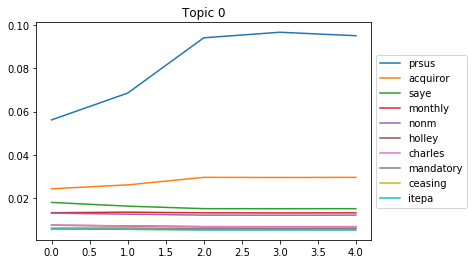

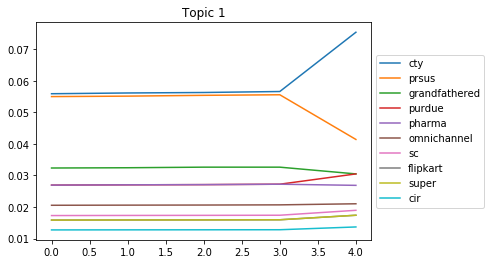

In [14]:
x = range(5)

for index, topic in enumerate(topic_list):
    plt.title("Topic " + str(index))

    for word in range(10):
        prob = [sub[word] for sub in topic]
        values = [probability[0] for probability in prob]
        plt.plot(x, values, label = prob[0][1])
        
    plt.legend(loc='center left', bbox_to_anchor=(1, 0.5))
    plt.show()